In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tobiasbueck/multilingual-customer-support-tickets")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'multilingual-customer-support-tickets' dataset.
Path to dataset files: /kaggle/input/multilingual-customer-support-tickets


In [ ]:
!apt-get install tree

!tree -a "/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/12"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/root/.cache/kagglehub/datasets/tobiasbueck/multilingual-customer-support-tickets/versions/12
├── aa_dataset-tickets-multi-lang-5-2-50-version.csv
├── dataset-tickets-german_normalized_50_5_2.csv
├── dataset-tickets-german_normalized.csv
├── dataset-tickets-multi-lang3-4k.csv
└── dataset-tickets-multi-lang-4-20k.csv

0 directories, 5 files


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/aa_dataset-tickets-multi-lang-5-2-50-version.csv")
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['language'] == 'en']
df.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Thank you for your inquiry. Please specify whi...,Request,Technical Support,high,en,51,Feature,Product,Documentation,Feedback,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np

# Stack the specified tag columns and find unique values
unique_tags = pd.unique(df[['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']].values.ravel())

# Filter out NaN values if any
unique_tags = [tag for tag in unique_tags if pd.notna(tag)]

print("Unique tags:")
display(unique_tags)

Unique tags:


['Account',
 'Disruption',
 'Outage',
 'IT',
 'Tech Support',
 'Product',
 'Feature',
 'Billing',
 'Payment',
 'Documentation',
 'Feedback',
 'Performance',
 'Network',
 'Hardware',
 'Bug',
 'Compatibility',
 'VPN',
 'Crash',
 'Service',
 'Sales',
 'Issue',
 'Support',
 'Inquiry',
 'Customer Support',
 'Marketing',
 'Automation',
 'Organization',
 'Campaign',
 'Lead',
 'Maintenance',
 'Notification',
 'Security',
 'Subscription',
 'Driver',
 'Audio',
 'Assistance',
 'Connectivity',
 'Dispute',
 'Emergency',
 'Equipment',
 'Alert',
 'Cloud',
 'Technology',
 'Recovery',
 'Configuration',
 'Finance',
 'Investment',
 'Information',
 'Integration',
 'Tool',
 'Platform',
 'Discrepancy',
 'Compliance',
 'Process',
 'Software',
 'Cloud-Native',
 'SaaS',
 'Update',
 'Microservice',
 'Return',
 'Invoice',
 'Incident',
 'Workflow',
 'Infrastructure',
 'Technical Support',
 'Refund',
 'Protocols',
 'Inspection',
 'Deployment',
 'Printer',
 'Document',
 'Connection',
 'Ink',
 'EMR',
 'Data Privacy'

In [ ]:
# 1. Define the mapping from your hundreds of tags to the 7 new categories.
# Using sets for fast O(1) average time complexity lookups.
tag_to_category_mapping = {
    'Security & Compliance': {'security', 'compliance', 'data privacy', 'hipaa', 'vulnerability', 'phishing', 'malware', 'encryption', 'firewall', 'access management', 'data breach', 'unauthorized access', 'security management', 'system integrity', 'data protection', 'regulatory', 'cybersecurity', 'threat', 'intrusion', 'breach', 'confidentiality', 'audit', 'risk management', 'cyberattack', 'cyber threat'},
    'Finance & Billing': {'billing', 'payment', 'refund', 'invoice', 'subscription', 'pricing', 'cost', 'dispute', 'finance', 'investment', 'return', 'transaction', 'payment gateway', 'discount', 'promotion', 'financial', 'expense', 'credit card'},
    'Technical Issues & Bugs': {'bug', 'crash', 'error', 'failure', 'performance', 'slowdown', 'disruption', 'malfunction', 'glitch', 'instability', 'compatibility', 'software conflict', 'app issue', 'system issue', 'technical issue', 'incident', 'update', 'patch', 'version mismatch', 'debugging', 'synchronization error'},
    'Infrastructure & Hardware': {'hardware', 'server', 'network', 'infrastructure', 'cloud', 'aws', 'gcp', 'azure', 'kubernetes', 'docker', 'database', 'platform', 'outage', 'downtime', 'connectivity', 'printer', 'device', 'router', 'storage', 'memory', 'driver', 'saas', 'api', 'load balancing'},
    'User Assistance & How-To': {'support', 'assistance', 'guidance', 'documentation', 'training', 'onboarding', 'configuration', 'installation', 'login', 'password', 'account', 'setup', 'how-to', 'troubleshooting', 'user interface', 'ui', 'usability', 'clarification', 'customer support'},
    'Sales, Product & Marketing Inquiries': {'sales', 'product', 'feature', 'inquiry', 'feedback', 'lead', 'campaign', 'marketing', 'seo', 'brand', 'trial', 'demo', 'pre-sale', 'recommendation'},
}

# List of the tag columns to check
tag_columns = [f'tag_{i}' for i in range(1, 9)]

def assign_category(row):
    """
    Checks the 8 tag columns for a row and assigns the first matching consolidated category.
    The order of the mapping dictionary determines the priority.
    """
    for tag_col in tag_columns:
        tag = row[tag_col]
        # Skip if the tag is empty (NaN)
        if pd.isna(tag):
            continue

        # Clean the tag for consistent matching
        cleaned_tag = str(tag).lower().strip()

        # Check against our mapping dictionary
        for category, keywords in tag_to_category_mapping.items():
            if cleaned_tag in keywords:
                return category # Return the first category that matches

    # If no specific category was found after checking all 8 tags, assign it to the default
    return 'General Inquiry'

# 2. Apply the function to your DataFrame to create the new target column
df['consolidated_category'] = df.apply(assign_category, axis=1)

# 3. Verify the result by checking the distribution of your new, clean labels
print("Distribution of new consolidated categories:")
print(df['consolidated_category'].value_counts())

print("\nDataFrame with the new category column:")
print(df[['tag_1', 'tag_2', 'consolidated_category']].head(10))


Distribution of new consolidated categories:
consolidated_category
Technical Issues & Bugs                 5270
Sales, Product & Marketing Inquiries    4656
Security & Compliance                   3342
Infrastructure & Hardware               1435
Finance & Billing                        927
User Assistance & How-To                 681
General Inquiry                           27
Name: count, dtype: int64

DataFrame with the new category column:
      tag_1       tag_2                 consolidated_category
1   Account  Disruption              User Assistance & How-To
2   Product     Feature  Sales, Product & Marketing Inquiries
3   Billing     Payment                     Finance & Billing
4   Product     Feature  Sales, Product & Marketing Inquiries
5   Feature     Product  Sales, Product & Marketing Inquiries
6    Outage  Disruption             Infrastructure & Hardware
7   Network    Hardware             Infrastructure & Hardware
10  Network  Disruption             Infrastructure & Ha

In [ ]:
categories_to_drop = ['General Inquiry']
df = df[~df['consolidated_category'].isin(categories_to_drop)]
print("DataFrame after removing 'User Assistance & How-To' and 'General Inquiry' categories:")
print(df['consolidated_category'].value_counts())

DataFrame after removing 'User Assistance & How-To' and 'General Inquiry' categories:
consolidated_category
Technical Issues & Bugs                 5270
Sales, Product & Marketing Inquiries    4656
Security & Compliance                   3342
Infrastructure & Hardware               1435
Finance & Billing                        927
User Assistance & How-To                 681
Name: count, dtype: int64


In [ ]:
# df.drop(columns=tag_columns, inplace=True)
df.drop(columns=['language', 'version', 'answer'], inplace=True)
df.head()

,subject,body,type,queue,priority,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,consolidated_category
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",Incident,Technical Support,high,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN,User Assistance & How-To
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Request,Returns and Exchanges,medium,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN,"Sales, Product & Marketing Inquiries"
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",Request,Billing and Payments,low,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN,Finance & Billing
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Problem,Sales and Pre-Sales,medium,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN,"Sales, Product & Marketing Inquiries"
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Request,Technical Support,high,Feature,Product,Documentation,Feedback,NaN,NaN,NaN,NaN,"Sales, Product & Marketing Inquiries"


### Exploratory Data Analysis and Data Cleaning

In [ ]:
df.describe(include='all')

,subject,body,type,queue,priority,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,consolidated_category
count,13707,16311,16311,16311,16311,16311,16310,16249,14609,8405,3364,1132,281,16311
unique,13707,16311,4,10,3,73,195,297,387,438,397,281,135,6
top,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",Incident,Technical Support,medium,Security,Performance,IT,Tech Support,Tech Support,Tech Support,Tech Support,Tech Support,Technical Issues & Bugs
freq,1,1,6562,4729,6608,3333,3357,3506,3814,2682,1102,239,53,5270


In [ ]:
df.isnull().sum()

,0
subject,2604
body,0
type,0
queue,0
priority,0
tag_1,0
tag_2,1
tag_3,62
tag_4,1702
tag_5,7906


In [ ]:
# Filter rows where 'subject' is null
df_null_subject = df[df['subject'].isnull()]

# Print the value_counts of 'consolidated_category' for these rows
print("Distribution of 'consolidated_category' for rows with null 'subject':")
print(df_null_subject['consolidated_category'].value_counts())

Distribution of 'consolidated_category' for rows with null 'subject':
consolidated_category
Technical Issues & Bugs                 827
Sales, Product & Marketing Inquiries    799
Security & Compliance                   489
Infrastructure & Hardware               230
User Assistance & How-To                131
Finance & Billing                       128
Name: count, dtype: int64


In [ ]:
df.dropna(subset=['subject'], inplace=True)
df['consolidated_category'].value_counts()

,count
consolidated_category,
Technical Issues & Bugs,4443
"Sales, Product & Marketing Inquiries",3857
Security & Compliance,2853
Infrastructure & Hardware,1205
Finance & Billing,799
User Assistance & How-To,550


In [ ]:
df['consolidated_category'].unique()

array(['User Assistance & How-To', 'Sales, Product & Marketing Inquiries',
       'Finance & Billing', 'Infrastructure & Hardware',
       'Technical Issues & Bugs', 'Security & Compliance'], dtype=object)

In [ ]:
df['subject'].unique()

array(['Account Disruption',
       'Query About Smart Home System Integration Features',
       'Inquiry Regarding Invoice Details', ...,
       'Performance Problem with Data Analytics Tool',
       'Update Request for SaaS Platform Integration Features',
       'Inquiry About Project Management Features'], dtype=object)

In [ ]:
df['subject'].value_counts()

,count
subject,
Account Disruption,1
Unapproved Entry Into Healthcare Data Management Platforms,1
Enhancing Data Security in Smartsheet for Medical Applications,1
Inquiry About Billing Options for ClickUp and Mailchimp Subscriptions,1
Dashboard Load Times Are Slow,1
...,...
Medical Systems Security Breach,1
System performance drops during peak times observed,1
Reports of Healthcare Provider Data Access Disruptions Today,1


In [ ]:
df.shape

(13707, 14)

In [ ]:
new_df = df[['subject', 'body', 'priority', 'consolidated_category']]
new_df.head()

,subject,body,priority,consolidated_category
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",high,User Assistance & How-To
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",medium,"Sales, Product & Marketing Inquiries"
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",low,Finance & Billing
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",medium,"Sales, Product & Marketing Inquiries"
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",high,"Sales, Product & Marketing Inquiries"


In [ ]:
new_df['priority'].value_counts()

,count
priority,
medium,5588
high,5296
low,2823


In [ ]:
print(f"Number of duplicate rows: {new_df.duplicated().sum()}")
display(new_df[new_df.duplicated(keep=False)].sort_index())

Number of duplicate rows: 0


,subject,body,priority,consolidated_category


In [ ]:
new_df.shape

(13707, 4)

In [ ]:
new_df = new_df.drop_duplicates()
print(f"Number of duplicate rows after removal: {new_df.duplicated().sum()}")
new_df.shape

Number of duplicate rows after removal: 0


(13707, 4)

Average description length (characters): 358.08
Average description length (words): 52.38
Average description length (sentences): 3.64


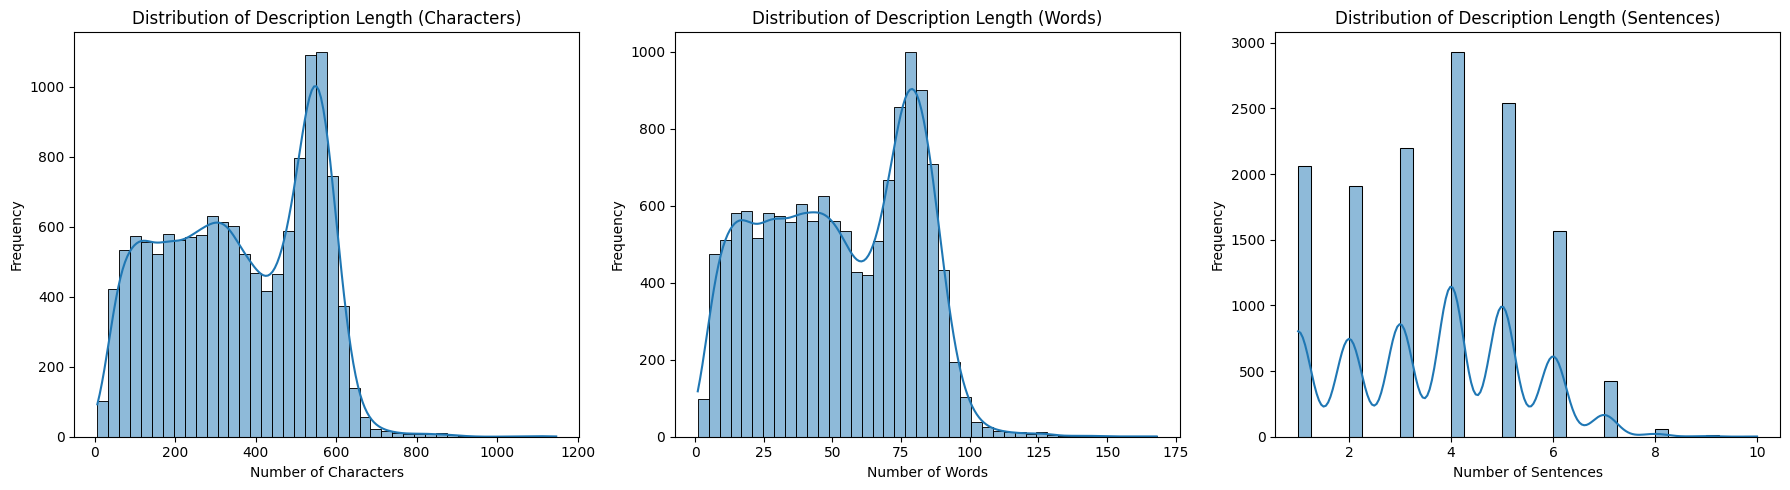

In [ ]:
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# Calculate description length in characters
new_df['description_length_chars'] = new_df['body'].apply(len)

# Calculate description length in words
new_df['description_length_words'] = new_df['body'].apply(lambda x: len(x.split()))

# Calculate description length in sentences
new_df['description_length_sentences'] = new_df['body'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Print average lengths
print(f"Average description length (characters): {new_df['description_length_chars'].mean():.2f}")
print(f"Average description length (words): {new_df['description_length_words'].mean():.2f}")
print(f"Average description length (sentences): {new_df['description_length_sentences'].mean():.2f}")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(new_df['description_length_chars'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Description Length (Characters)')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')

sns.histplot(new_df['description_length_words'], ax=axes[1], kde=True)
axes[1].set_title('Distribution of Description Length (Words)')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

sns.histplot(new_df['description_length_sentences'], ax=axes[2], kde=True)
axes[2].set_title('Distribution of Description Length (Sentences)')
axes[2].set_xlabel('Number of Sentences')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Ticket Classes and their Assigned Teams


In [ ]:
from IPython.display import HTML, display

html = """
<div id="my-ticket-table" style="font-size:16px; line-height:1.5;">
  <table style="border-collapse:collapse; width:100%;">
    <thead>
      <tr>
        <th style="text-align:left; padding:8px 12px; border-bottom:2px solid #ddd;">Consolidated Tag</th>
        <th style="text-align:left; padding:8px 12px; border-bottom:2px solid #ddd;">Assigned Team</th>
        <th style="text-align:left; padding:8px 12px; border-bottom:2px solid #ddd;">Team's Responsibility</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;"><b>Technical Issues & Bugs</b></td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">🐞 L2/L3 Engineering & Ops Team</td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">The deep technical experts who investigate, debug, and fix software bugs, performance bottlenecks, and application crashes.</td>
      </tr>
      <tr>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;"><b>Infrastructure & Hardware</b></td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">☁️ Infrastructure & Cloud Team</td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">Manages servers, cloud services (AWS, Azure), databases, and network stability. They handle outages, downtime, and hardware problems.</td>
      </tr>
      <tr>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;"><b>Security & Compliance</b></td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">🛡️ Security Operations (SecOps) & Compliance</td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">A specialized, high-priority team that handles all security threats, data privacy (HIPAA, GDPR), vulnerabilities, and access management.</td>
      </tr>
      <tr>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;"><b>Finance & Billing</b></td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">💰 Finance & Billing Support Team</td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">Manages all monetary transactions: processing refunds, correcting invoices, handling payment gateway issues, and managing subscriptions.</td>
      </tr>
      <tr>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;"><b>User Assistance & How-To</b></td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">🙋 L1 Customer Support Team</td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">The front-line support agents who help users with general account issues, installation, configuration, password resets, and guidance on using product features.</td>
      </tr>
      <tr>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;"><b>Sales, Product & Marketing</b></td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">📈 Sales & Product Specialist Team</td>
        <td style="padding:8px 12px; border-bottom:1px solid #eee;">Handles questions from potential customers, gathers product feedback and feature requests, and manages marketing campaign inquiries.</td>
      </tr>
    </tbody>
  </table>
</div>
"""

display(HTML(html))

Consolidated Tag,Assigned Team,Team's Responsibility
Technical Issues & Bugs,🐞 L2/L3 Engineering & Ops Team,"The deep technical experts who investigate, debug, and fix software bugs, performance bottlenecks, and application crashes."
Infrastructure & Hardware,☁️ Infrastructure & Cloud Team,"Manages servers, cloud services (AWS, Azure), databases, and network stability. They handle outages, downtime, and hardware problems."
Security & Compliance,🛡️ Security Operations (SecOps) & Compliance,"A specialized, high-priority team that handles all security threats, data privacy (HIPAA, GDPR), vulnerabilities, and access management."
Finance & Billing,💰 Finance & Billing Support Team,"Manages all monetary transactions: processing refunds, correcting invoices, handling payment gateway issues, and managing subscriptions."
User Assistance & How-To,🙋 L1 Customer Support Team,"The front-line support agents who help users with general account issues, installation, configuration, password resets, and guidance on using product features."
"Sales, Product & Marketing",📈 Sales & Product Specialist Team,"Handles questions from potential customers, gathers product feedback and feature requests, and manages marketing campaign inquiries."


### Data Preprocessing

In [ ]:
new_df['full_text'] = new_df['subject'] + " " + new_df['body']
new_df.head()

,subject,body,priority,consolidated_category,description_length_chars,description_length_words,description_length_sentences,full_text
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...",high,User Assistance & How-To,544,82,4,"Account Disruption Dear Customer Support Team,..."
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",medium,"Sales, Product & Marketing Inquiries",534,76,3,Query About Smart Home System Integration Feat...
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",low,Finance & Billing,605,91,4,Inquiry Regarding Invoice Details Dear Custome...
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",medium,"Sales, Product & Marketing Inquiries",677,97,4,Question About Marketing Agency Software Compa...
5,Feature Query,"Dear Customer Support,\n\nI hope this message ...",high,"Sales, Product & Marketing Inquiries",646,97,6,"Feature Query Dear Customer Support,\n\nI hope..."


# ✍️ Text Preprocessing Pipeline Explained

Here's a breakdown of each step in the `perfect_preprocess_text` function. This pipeline is designed to clean raw text and transform it into a useful format for machine learning models, especially for tasks like issue classification.

---

## 1. Convert to Lowercase
* **What it does:** Converts all characters in the text to lowercase.
* **Why it's important:** This ensures consistency. The model will treat **"Error"**, **"error"**, and **"ERROR"** as the same word, preventing it from thinking they are three different things.

`"My Account IS LOCKED!"` → `"my account is locked!"`

---

## 2. Aggressive Noise Removal (with Regex)
* **What it does:** Uses Regular Expressions (regex)—special patterns for finding and matching text—to remove common "noise" that isn't useful for understanding the core message.
* **We remove:**
    * **URLs & Emails:** `http://...`, `www...`, `user@example.com`
    * **HTML Tags:** `<p>`, `<div>`, `<b>`
    * **Phone Numbers:** `1-800-555-1234`
    * **Long IDs/Codes:** `f2f5f6fd1234567890abcdef`
* **Why it's important:** These elements are specific to one user or instance and don't help the model learn general patterns about issue types. Removing them cleans the data significantly.

---

## 3. Remove Non-Alphabetic Characters
* **What it does:** Removes any character that is not a letter (`a-z`) or a space.
* **Why it's important:** This gets rid of all remaining punctuation (`!`, `?`, `.`), numbers, and special symbols (`😠`, `#`, `$`). This leaves us with only the words themselves.

`"my account is locked! 😠"` → `"my account is locked "`

---

## 4. Tokenization
* **What it does:** Splits the cleaned string of text into a list of individual words, or "**tokens**".
* **Why it's important:** Machine learning models work with words, not long strings. Tokenization is the fundamental step of breaking down sentences into their component parts so we can analyze each one.



`"my account is locked"` → `['my', 'account', 'is', 'locked']`

---

## 5. Part-of-Speech (POS) Tagging
* **What it does:** Analyzes the list of tokens and assigns a "**Part of Speech**" tag to each one (e.g., noun, verb, adjective).
* **Why it's important:** This step is a prerequisite for accurate lemmatization. Knowing that "working" is a verb allows the lemmatizer to correctly find its root form, "work".

`['account', 'is', 'locked']` → `[('account', 'NN'), ('is', 'VBZ'), ('locked', 'VBN')]`
*(NN=Noun, VBZ=Verb, VBN=Verb)*

---

## 6. POS-Aware Lemmatization
* **What it does:** Reduces each word to its base or dictionary form, called a "**lemma**," using the POS tag for context.
* **Why it's important:** This groups different forms of a word into a single concept. For example, **"works"**, **"working"**, and **"worked"** all get converted to **"work"**. This helps the model understand that all these words refer to the same idea, which is much more powerful than treating them as three separate words.

`[('locked', 'VBN')]` → `'lock'`

---

## 7. Remove Stop Words & Short Words
* **What it does:** Filters the list of lemmatized tokens to remove:
    * **Standard Stop Words:** Common words with little meaning, like "the", "a", "is", "in".
    * **Custom Stop Words:** Words you've defined as common but unhelpful for your specific data (e.g., `product`, `item`, `customer`).
    * **Short Words:** Any remaining tokens with 1 or 2 letters, which are often just noise.
* **Why it's important:** This step removes the "fluff" and focuses the dataset on the words that truly describe the issue. We specifically keep **negations** (like "not") because they are critical for understanding the problem (e.g., "not working").

`['my', 'account', 'be', 'lock']` → `['account', 'lock']`
*(Here, 'my' and 'be' are removed as stopwords)*

---

## 8. Join Tokens Back into a String
* **What it does:** The final step joins the clean, processed tokens back into a single string with spaces in between.
* **Why it's important:** This creates the final `processed_text` which is a clean, feature-rich representation of the original text, ready to be fed into a machine learning model.

`['account', 'lock']` → `"account lock"`

In [ ]:
# Get all words from the 'full_text' column
all_full_words = new_df['full_text'].str.split(expand=True).stack()

# Get unique words
unique_full_words = all_full_words.unique()

print(len(unique_full_words))

11861


In [ ]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd

# --- Simplified & More Direct NLTK Data Downloads ---
# This approach directly calls the downloader for each package to ensure
# they are correctly installed and registered in your environment.
try:
    print("Downloading NLTK resources...")
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('averaged_perceptron_tagger_eng', quiet=True) # Added this line
    print("All necessary NLTK resources are downloaded.")
except Exception as e:
    print(f"An error occurred during NLTK download: {e}")


# --- Initialization ---
lemmatizer = WordNetLemmatizer()

# --- Stop Words Strategy ---
stop_words = set(stopwords.words('english'))
negations = {'no', 'not', 'nor', 'neither', "don't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't"}
useless_words = {'dear', 'customer', 'support', 'team', 'NaN', 'null', 'NA'}
stop_words = stop_words.union(useless_words)
stop_words = stop_words - negations

# --- Helper Function for POS-aware Lemmatization ---
def get_wordnet_pos(treebank_tag):
    """Maps NLTK POS tags to WordNet POS tags."""
    if not treebank_tag: # Added this check
        return wordnet.NOUN # Default to noun if no tag is found
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# --- The Main Preprocessing Function ---
def perfect_preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'(https?|ftp)://[^\s/$.?#].[^\s]*|www\.\S+|(\S+@\S+)|([a-z]:\\[^\s:]+)', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'\b(?:\d[ -]?){6,12}\d\b', ' ', text)
    text = re.sub(r'\b[a-z0-9]{20,}\b', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    processed_tokens = [
        word for word in lemmatized_tokens if word not in stop_words and len(word) > 2
    ]
    return " ".join(processed_tokens).strip()

# Apply the new, perfected function
new_df['processed_text'] = new_df['full_text'].apply(perfect_preprocess_text)

new_df[['full_text', 'processed_text']].head()

All necessary NLTK resources are downloaded.


,full_text,processed_text
1,"Account Disruption Dear Customer Support Team,...",account disruption write report significant pr...
2,Query About Smart Home System Integration Feat...,query smart home system integration feature ho...
3,Inquiry Regarding Invoice Details Dear Custome...,inquiry regard invoice detail hope message fin...
4,Question About Marketing Agency Software Compa...,question marketing agency software compatibili...
5,"Feature Query Dear Customer Support,\n\nI hope...",feature query hope message reach good health e...


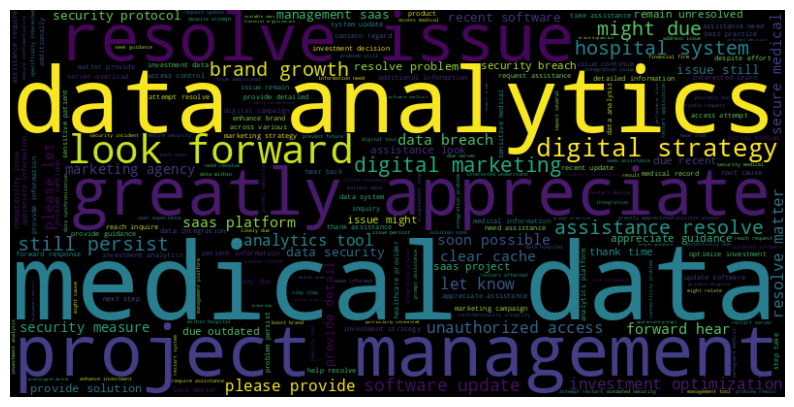

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the processed text into a single string
all_processed_text = " ".join(new_df['processed_text'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_processed_text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

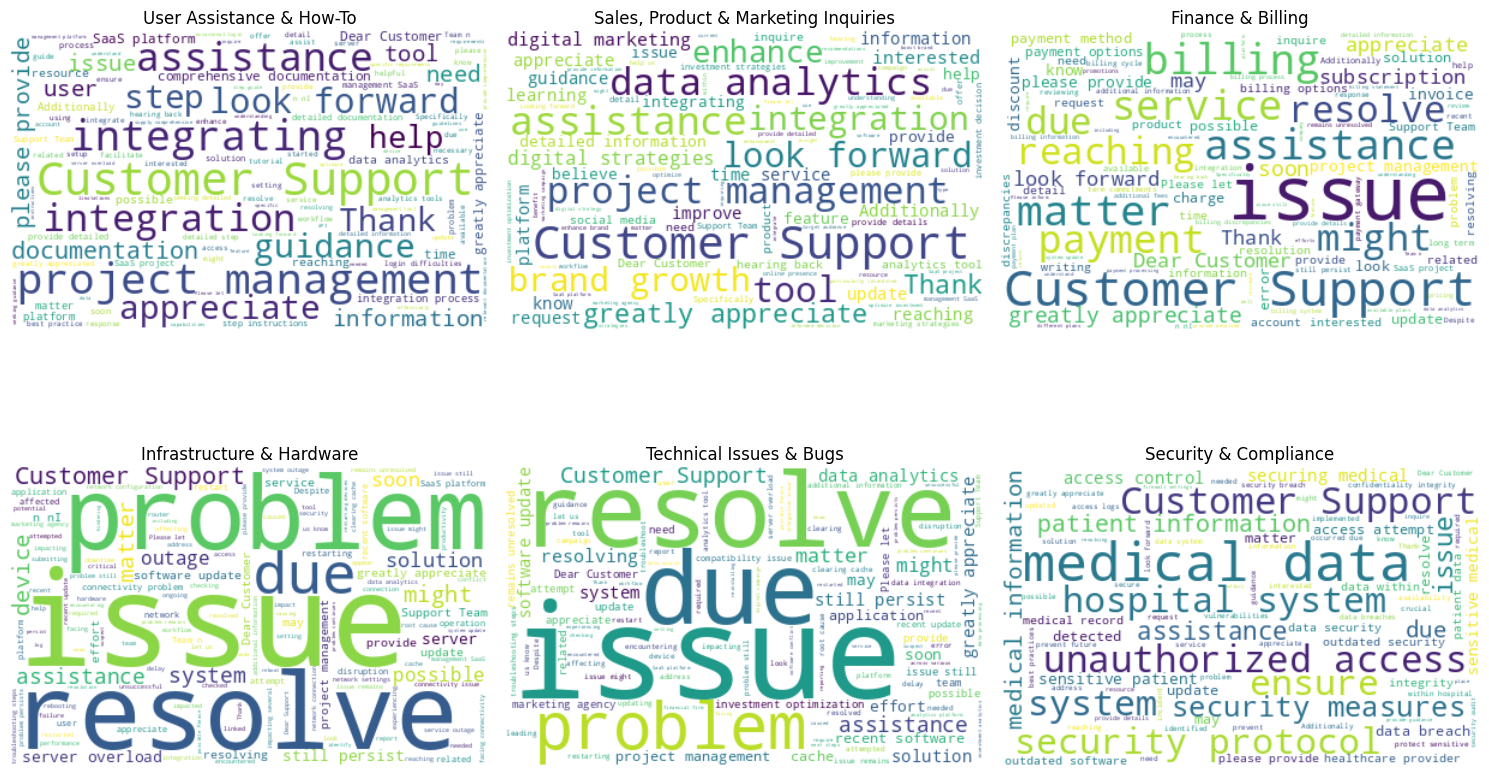

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get unique categories
unique_categories = new_df['consolidated_category'].unique()

# Determine grid size (simple approach: square-like grid)
n_categories = len(unique_categories)
n_cols = 3 # You can adjust the number of columns
n_rows = (n_categories + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Generate and display word cloud for each category
for i, category in enumerate(unique_categories):
    # Filter data for the current category
    category_text = " ".join(new_df[new_df['consolidated_category'] == category]['processed_text'].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=400, height=250, background_color='white').generate(category_text)

    # Display on the corresponding subplot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(category)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

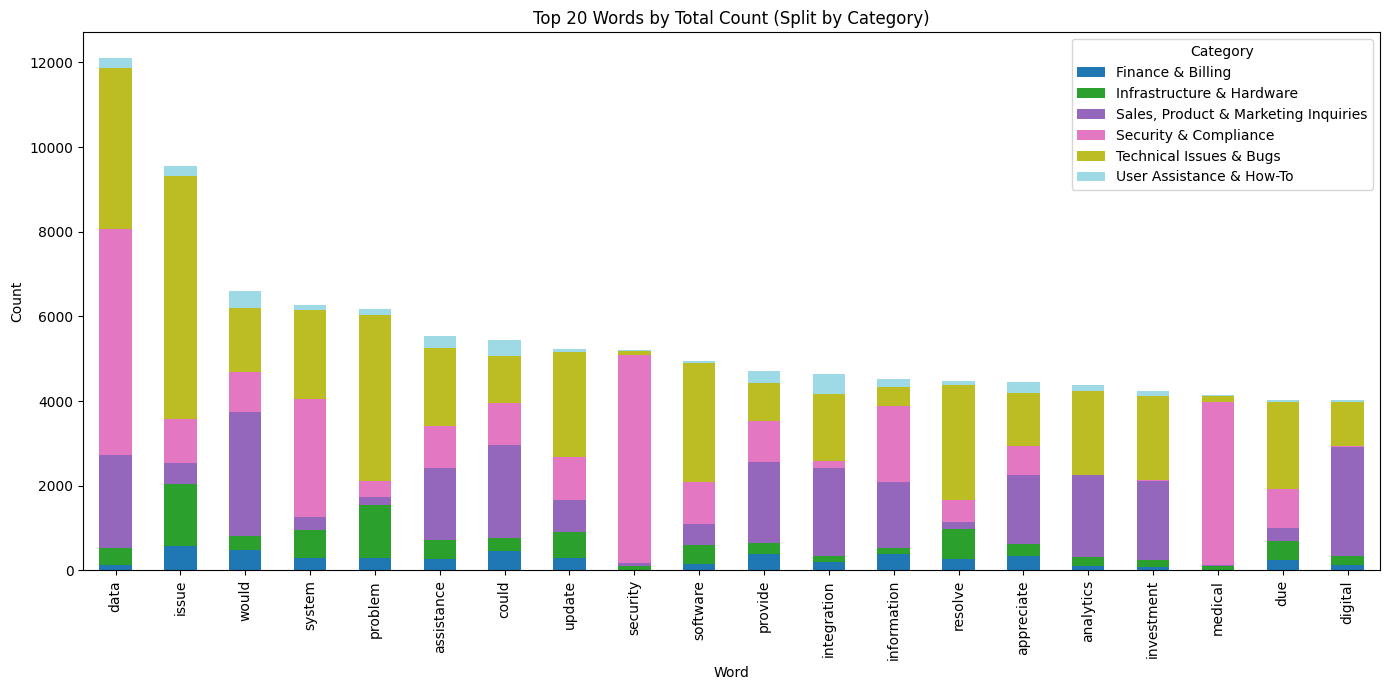

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Split text into words for each row
new_df["tokens"] = new_df["processed_text"].str.split()

# Step 2: Create a list of (word, category) pairs
rows = []
for _, row in new_df.iterrows():
    category = row["consolidated_category"]
    for word in row["tokens"]:
        rows.append((word, category))

# Step 3: Convert into DataFrame
word_cat_df = pd.DataFrame(rows, columns=["word", "category"])

# Step 4: Count word-category occurrences
word_counts = (
    word_cat_df
    .groupby(["word", "category"])
    .size()
    .reset_index(name="count")
)

# Step 5: Pivot so categories become columns
pivot_counts = word_counts.pivot(index="word", columns="category", values="count").fillna(0)

# Step 6: Add total counts per word
pivot_counts["total"] = pivot_counts.sum(axis=1)

# Step 7: Sort by total counts
pivot_counts = pivot_counts.sort_values("total", ascending=False)

# Step 8: Plot stacked bar chart
pivot_counts.drop(columns="total").head(20).plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="tab20"  # better color palette
)

plt.title("Top 20 Words by Total Count (Split by Category)")
plt.xlabel("Word")
plt.ylabel("Count")
plt.legend(title="Category")
plt.tight_layout()
plt.show()


In [ ]:
# Get all words from the 'full_text' column
all_full_words = new_df['processed_text'].str.split(expand=True).stack()

# Get unique words
unique_full_words = all_full_words.unique()

print(len(unique_full_words))

3722


## Hyperparameter tuning script (embedded)

In [ ]:
!pip install gensim

### Pipeline Components:
*   Vectorizations Used -> Bag of Words, N-grams and TF/IDF <br>
*   Embeddings Used -> Word2Vec <br>
*   Models Used -> Logistic Regression, SGDClassifier, LinearSVC, Random Forest, XGBoost, LightGBM, Extra Trees Classifier, Multinomial Naive Bayes, Complement Naive Bayes

In [ ]:
# Full updated tuning cell — drop-in replacement.
# - Supports CountVectorizer, TfidfVectorizer, Word2Vec (KeyedVectors)
# - Calibrated LinearSVC and SGD to provide predict_proba
# - LightGBM and XGBoost wrappers with label-encoding + dtype handling
# - class_weight='balanced' where supported
# - Safe GridSearchCV / RandomizedSearchCV usage with error_score=np.nan
# - Accepts vectorizers_to_use so you can comment/uncomment Count/Tfidf/Word2Vec easily
#
# Usage examples:
# 1) Run all three (BOW + TFIDF + Word2Vec):
#    kv = KeyedVectors.load_word2vec_format('/path/to/emb.bin', binary=True)
#    results_df = run_tuning(X_train, X_test, y_train, y_test, w2v_kv=kv, vectorizers_to_use=['Count','Tfidf','Word2Vec'])
#
# 2) Only Word2Vec:
#    results_df = run_tuning(..., w2v_kv=kv, vectorizers_to_use=['Word2Vec'])
#
# IMPORTANT: pass explicit X_train, X_test, y_train, y_test; do NOT rely on globals.

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
import pandas as pd, numpy as np, time, joblib, os, json

# Optional dependencies
try:
    from lightgbm import LGBMClassifier
except Exception:
    LGBMClassifier = None
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None
try:
    from gensim.models import KeyedVectors
except Exception:
    KeyedVectors = None

# -------------------------
# Word2Vec transformer
# -------------------------
class Word2VecVectorizer(TransformerMixin, BaseEstimator):
    def __init__(self, keyed_vectors, aggregation='mean', use_idf=False, token_pattern=r"(?u)\b\w\w+\b"):
        if KeyedVectors is None:
            raise ImportError("gensim is required for Word2VecVectorizer. Install gensim.")
        self.keyed_vectors = keyed_vectors
        self.aggregation = aggregation
        self.use_idf = use_idf
        self.token_pattern = token_pattern
        self.vector_size = getattr(keyed_vectors, 'vector_size', None)
        self._tfidf = None

    def _tokenize(self, doc):
        if not isinstance(doc, str):
            return []
        if self.token_pattern is None:
            return doc.split()
        import re
        return re.findall(self.token_pattern, doc.lower())

    def fit(self, X, y=None):
        if self.use_idf:
            from sklearn.feature_extraction.text import TfidfVectorizer
            self._tfidf = TfidfVectorizer(token_pattern=self.token_pattern).fit(X)
        return self

    def transform(self, X):
        if self.vector_size is None:
            raise ValueError("Provided keyed_vectors has no attribute 'vector_size'.")
        mat = np.zeros((len(X), self.vector_size), dtype=float)
        for i, doc in enumerate(X):
            tokens = self._tokenize(doc)
            vecs = []
            weights = []
            for t in tokens:
                if t in self.keyed_vectors:
                    vec = self.keyed_vectors[t]
                    w = 1.0
                    if self.use_idf and self._tfidf is not None:
                        try:
                            idx = self._tfidf.vocabulary_.get(t)
                            if idx is not None:
                                w = float(self._tfidf.idf_[idx])
                        except Exception:
                            w = 1.0
                    vecs.append(vec * w)
                    weights.append(w)
            if len(vecs) == 0:
                continue
            arr = np.vstack(vecs)
            if self.aggregation == 'mean':
                mat[i] = arr.sum(axis=0) / (sum(weights) if sum(weights) != 0 else arr.shape[0])
            elif self.aggregation == 'max':
                mat[i] = arr.max(axis=0)
            else:
                mat[i] = arr.mean(axis=0)
        return mat


# -------------------------
# LightGBM wrapper (label encode + dtype)
# -------------------------
class LGBMWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **lgb_params):
        if LGBMClassifier is None:
            raise ImportError("lightgbm is required for LGBMWrapper. Install lightgbm.")
        if 'n_jobs' not in lgb_params:
            lgb_params['n_jobs'] = 1
        self._lgb_params = dict(lgb_params)
        self.estimator = LGBMClassifier(**self._lgb_params)
        self.le = None

    def _prepare_X(self, X):
        if sparse.issparse(X):
            X = X.tocsr()
            if X.dtype not in (np.float32, np.float64):
                X = X.astype(np.float32)
        else:
            X = np.asarray(X, dtype=np.float32)
        return X

    def fit(self, X, y, **fit_params):
        self.le = LabelEncoder()
        y_enc = self.le.fit_transform(y)
        X2 = self._prepare_X(X)
        try:
            self.estimator.set_params(**self._lgb_params)
        except Exception:
            pass
        self.estimator.fit(X2, y_enc, **fit_params)
        return self

    def predict(self, X):
        X2 = self._prepare_X(X)
        y_pred_enc = self.estimator.predict(X2)
        return self.le.inverse_transform(y_pred_enc.astype(int))

    def predict_proba(self, X):
        X2 = self._prepare_X(X)
        return self.estimator.predict_proba(X2)

    def set_params(self, **params):
        self._lgb_params.update(params)
        try:
            self.estimator.set_params(**params)
        except Exception:
            pass
        return self

    def get_params(self, deep=True):
        out = dict(self._lgb_params)
        try:
            out.update(self.estimator.get_params(deep=deep))
        except Exception:
            pass
        return out


# -------------------------
# XGBoost wrapper (label encode + dtype)
# -------------------------
class XGBWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **xgb_params):
        if XGBClassifier is None:
            raise ImportError("xgboost is required for XGBWrapper. Install xgboost.")
        if 'n_jobs' not in xgb_params:
            xgb_params['n_jobs'] = 1
        # avoid label encoder warnings in some versions
        if 'use_label_encoder' not in xgb_params:
            try:
                xgb_params['use_label_encoder'] = False
            except Exception:
                pass
        self._xgb_params = dict(xgb_params)
        self.estimator = XGBClassifier(**self._xgb_params)
        self.le = None

    def _prepare_X(self, X):
        if sparse.issparse(X):
            X = X.tocsr()
            if X.dtype not in (np.float32, np.float64):
                X = X.astype(np.float32)
        else:
            X = np.asarray(X, dtype=np.float32)
        return X

    def fit(self, X, y, **fit_params):
        self.le = LabelEncoder()
        y_enc = self.le.fit_transform(y)
        X2 = self._prepare_X(X)
        try:
            self.estimator.set_params(**self._xgb_params)
        except Exception:
            pass
        # sklearn API handles multiclass when using XGBClassifier
        self.estimator.fit(X2, y_enc, **fit_params)
        return self

    def predict(self, X):
        X2 = self._prepare_X(X)
        y_pred_enc = self.estimator.predict(X2)
        return self.le.inverse_transform(y_pred_enc.astype(int))

    def predict_proba(self, X):
        X2 = self._prepare_X(X)
        return self.estimator.predict_proba(X2)

    def set_params(self, **params):
        self._xgb_params.update(params)
        try:
            self.estimator.set_params(**params)
        except Exception:
            pass
        return self

    def get_params(self, deep=True):
        out = dict(self._xgb_params)
        try:
            out.update(self.estimator.get_params(deep=deep))
        except Exception:
            pass
        return out


# -------------------------
# Main runner
# -------------------------
def run_tuning(
    X_train,
    X_test,
    y_train,
    y_test,
    w2v_kv=None,
    w2v_path=None,
    vectorizers_to_use=None,   # list of names: any subset of ['Count','Tfidf','Word2Vec']
    use_random_search=False,
    n_iter_random=20,
    cv_splits=3,
    scoring='f1_macro',
    n_jobs=-1,
    output_dir='model_tuning_outputs'
):
    """
    Run hyperparameter tuning across requested vectorizers & models.
    - Pass explicit X_train, X_test, y_train, y_test.
    - If 'Word2Vec' is requested, provide w2v_kv (KeyedVectors) or w2v_path.
    """

    # Default to all vectorizers if not provided
    if vectorizers_to_use is None:
        vectorizers_to_use = ['Count', 'Tfidf', 'Word2Vec']

    allowed = {'Count', 'Tfidf', 'Word2Vec'}
    invalid = [v for v in vectorizers_to_use if v not in allowed]
    if invalid:
        raise ValueError(f"Invalid vectorizer names requested: {invalid}. Allowed: {allowed}")

    # Load / validate Word2Vec if requested
    kv = None
    if 'Word2Vec' in vectorizers_to_use:
        if w2v_kv is not None:
            kv = w2v_kv
        elif w2v_path is not None:
            if KeyedVectors is None:
                raise ImportError("gensim KeyedVectors required to load Word2Vec. Install gensim or pass w2v_kv.")
            try:
                if w2v_path.endswith('.kv'):
                    kv = KeyedVectors.load(w2v_path, mmap='r')
                else:
                    kv = KeyedVectors.load_word2vec_format(w2v_path, binary=True)
            except Exception as e:
                raise RuntimeError(f"Failed to load Word2Vec from '{w2v_path}': {e}")
        else:
            raise ValueError(
                "You requested 'Word2Vec' but did not provide w2v_kv or w2v_path. "
                "Pass w2v_kv=KeyedVectors or w2v_path='/path/to/emb.bin'."
            )

    # Build vectorizers & param grids only for requested vectorizers
    vectorizers = {}
    vectorizer_param_grid = {}

    if 'Count' in vectorizers_to_use:
        vectorizers['Count'] = CountVectorizer()
        vectorizer_param_grid['Count'] = {
            'vect__ngram_range': [(1, 1), (1, 2)],
            'vect__max_df': [0.85, 1.0],
            'vect__min_df': [1, 2],
            'vect__max_features': [None, 10000]
        }

    if 'Tfidf' in vectorizers_to_use:
        vectorizers['Tfidf'] = TfidfVectorizer()
        vectorizer_param_grid['Tfidf'] = {
            'vect__ngram_range': [(1, 1), (1, 2)],
            'vect__max_df': [0.8, 0.85, 1.0],
            'vect__min_df': [1],
            'vect__max_features': [None, 5000, 10000],
            'vect__use_idf': [True, False]
        }

    if 'Word2Vec' in vectorizers_to_use:
        vectorizers['Word2Vec'] = Word2VecVectorizer(keyed_vectors=kv)
        vectorizer_param_grid['Word2Vec'] = {'vect__aggregation': ['mean'], 'vect__use_idf': [False]}

    if not vectorizers:
        raise RuntimeError("No vectorizers were configured. Provide vectorizers_to_use with at least one name.")

    # -------------------------
    # Models and parameter grids (class_weight where supported)
    # -------------------------
    models_and_parameters = {}

    # LogisticRegression (supports class_weight)
    models_and_parameters['LogisticRegression'] = (
        LogisticRegression(max_iter=5000, random_state=42),
        {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l2'],
            'clf__solver': ['lbfgs', 'saga'],
            'clf__class_weight': [None, 'balanced']
        }
    )

    # Calibrated LinearSVC (calibration provides predict_proba). Tune underlying estimator via clf__estimator__*
    base_lsvc = LinearSVC(max_iter=5000, random_state=42)
    calibrated_lsvc = CalibratedClassifierCV(estimator=base_lsvc, cv=3, method='sigmoid')
    models_and_parameters['CalibratedLinearSVC'] = (
        calibrated_lsvc,
        {
            'clf__estimator__C': [0.01, 0.1, 1, 10],
            'clf__estimator__class_weight': [None, 'balanced']
        }
    )

    # RandomForest
    models_and_parameters['RandomForest'] = (
        RandomForestClassifier(random_state=42, n_jobs=1),
        {
            'clf__n_estimators': [100, 300],
            'clf__max_depth': [None, 20, 50],
            'clf__class_weight': [None, 'balanced']
        }
    )

    # ExtraTrees
    models_and_parameters['ExtraTrees'] = (
        ExtraTreesClassifier(random_state=42, n_jobs=1),
        {
            'clf__n_estimators': [100, 300],
            'clf__max_depth': [None, 30],
            'clf__class_weight': [None, 'balanced']
        }
    )

    # Naive Bayes (no class_weight param)
    models_and_parameters['MultinomialNB'] = (MultinomialNB(), {'clf__alpha': [0.1, 0.5, 1.0]})
    models_and_parameters['ComplementNB'] = (ComplementNB(), {'clf__alpha': [0.1, 0.5, 1.0]})

    # Calibrated SGD (underlying SGD supports class_weight)
    base_sgd = SGDClassifier(max_iter=5000, tol=1e-3, random_state=42)
    calibrated_sgd = CalibratedClassifierCV(estimator=base_sgd, cv=3, method='sigmoid')
    models_and_parameters['CalibratedSGD'] = (
        calibrated_sgd,
        {
            'clf__estimator__alpha': [1e-4, 1e-3, 1e-2],
            'clf__estimator__loss': ['log_loss', 'hinge'],
            'clf__estimator__class_weight': [None, 'balanced']
        }
    )

    # LightGBM (wrapped)
    if LGBMClassifier is not None:
        models_and_parameters['LightGBM'] = (
            LGBMWrapper(),
            {
                'clf__n_estimators': [100, 300],
                'clf__num_leaves': [31, 50],
                'clf__learning_rate': [0.05, 0.1],
                'clf__class_weight': [None, 'balanced']
            }
        )
    else:
        print("Warning: lightgbm not installed; LightGBM will be skipped.")

    # XGBoost (wrapped)
    if XGBClassifier is not None:
        models_and_parameters['XGBoost'] = (
            XGBWrapper(),
            {
                'clf__n_estimators': [100, 300],
                'clf__max_depth': [3, 6],
                'clf__learning_rate': [0.05, 0.1]
            }
        )
    else:
        print("Warning: xgboost not installed; XGBoost will be skipped.")

    # -------------------------
    # Run searches
    # -------------------------
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    results = []
    os.makedirs(output_dir, exist_ok=True)

    for vect_name, vect_obj in vectorizers.items():
        for model_name, (model_obj, model_grid) in models_and_parameters.items():
            print(f"\n--- Searching: Vectorizer={vect_name} | Model={model_name} ---")
            pipe = Pipeline([('vect', vect_obj), ('clf', model_obj)])

            # Merge grids
            full_grid = {}
            vgrid = vectorizer_param_grid.get(vect_name, {})
            full_grid.update(vgrid)
            full_grid.update(model_grid)

            # Choose searcher
            if use_random_search:
                searcher = RandomizedSearchCV(
                    pipe,
                    param_distributions=full_grid,
                    n_iter=n_iter_random,
                    scoring=scoring,
                    cv=cv,
                    n_jobs=n_jobs,
                    verbose=1,
                    random_state=42,
                    refit=True,
                    error_score=np.nan
                )
            else:
                searcher = GridSearchCV(
                    pipe,
                    param_grid=full_grid,
                    scoring=scoring,
                    cv=cv,
                    n_jobs=n_jobs,
                    verbose=1,
                    refit=True,
                    error_score=np.nan
                )

            t0 = time.time()
            try:
                searcher.fit(X_train, y_train)
            except Exception as e:
                # Print short repr (keeps log readable) and continue
                print(f"Search failed for {vect_name} + {model_name}: {repr(e)}")
                continue
            t1 = time.time()

            best = searcher.best_estimator_
            # collect probability support info
            has_proba = hasattr(best, "predict_proba")
            try:
                y_proba = best.predict_proba(X_test) if has_proba else None
            except Exception:
                y_proba = None

            y_pred = best.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            prf = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)
            class_report = classification_report(y_test, y_pred, zero_division=0)
            cm = confusion_matrix(y_test, y_pred)

            model_file = os.path.join(output_dir, f"{vect_name}__{model_name}__best.pkl")
            joblib.dump(best, model_file)

            results.append({
                'vectorizer': vect_name,
                'model': model_name,
                'best_cv_score': getattr(searcher, 'best_score_', np.nan),
                'test_accuracy': acc,
                'test_precision_macro': prf[0],
                'test_recall_macro': prf[1],
                'test_f1_macro': prf[2],
                'best_params': getattr(searcher, 'best_params_', {}),
                'fit_time_sec': t1 - t0,
                'model_file': model_file,
                'classification_report': class_report,
                'confusion_matrix': cm.tolist(),
                'has_predict_proba': has_proba
            })

            # --- Create a structured report dictionary ---
            report_data = {
                "Best CV score": getattr(searcher, 'best_score_', np.nan),
                "Best params": getattr(searcher, 'best_params_', {}),
                "Test metrics": {
                    'accuracy': acc,
                    'precision_macro': prf[0],
                    'recall_macro': prf[1],
                    'f1_macro': prf[2]
                },
                "Classification report": classification_report(y_test, y_pred, zero_division=0, output_dict=True),
                "Confusion matrix": cm.tolist(),
                "Supports predict_proba": has_proba
            }

            # --- Save the report as a JSON file ---
            report_path = os.path.join(output_dir, f"{vect_name}__{model_name}__report.json")
            with open(report_path, 'w', encoding='utf-8') as fh:
                # Use json.dump for clean, structured output
                json.dump(report_data, fh, indent=4)

    # Aggregate results
    results_df = pd.DataFrame(results)
    if not results_df.empty:
        results_df = results_df.sort_values(['test_f1_macro'], ascending=False).reset_index(drop=True)
        results_df.to_csv(os.path.join(output_dir, "summary_results.csv"), index=False)
        print("\n=== Summary results (top 10) ===")
        print(results_df.head(10).to_string(index=False))
    else:
        print("\n=== Summary results (top 10) ===")
        print("No results (all searches may have failed).")

    return results_df


### Run the tuner
Execute the cell below to start the hyperparameter tuning. Adjust `use_random_search`, `n_iter_random`, and `cv_splits` to suit your compute budget.

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("leadbest/googlenewsvectorsnegative300")

# print("Path to dataset files:", path)

In [ ]:
!tree -a /root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2

/root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2  [error opening dir]

0 directories, 0 files


### I have used pretrained word2vec embeddings that too we have used less powerful embeddings due to memory crash issues there are work around this but as of now I have just tested on small embeddings. We can also get embeddings from our dataset and use that for models.

Note: Word2Vec with Naive Bayes doesn't work as the embeddings can be negative and negative-valued embeddings violate the assumption that features are non-negative frequencies for Naive Bayes.


In [ ]:
from sklearn.model_selection import train_test_split
import gensim.downloader as api

# Prepare data
X = new_df['processed_text']
y = new_df['consolidated_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Load your pretrained word2vec (example)
# kv = KeyedVectors.load_word2vec_format('/root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2/GoogleNews-vectors-negative300.bin', binary=True) -> crashes due to huge memory usage
kv = api.load('glove-wiki-gigaword-100')   # ~128MB on disk -> safe on Colab
# or KeyedVectors.load('/mnt/data/my_w2v.kv', mmap='r')

# Run tuning for Word2Vec only (much quicker)
results_df = run_tuning(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    w2v_kv=kv,
    vectorizers_to_use=['Count', 'Tfidf', 'Word2Vec'],
    use_random_search=True,           # faster during experimentation
    n_iter_random=20,
    cv_splits=3,
    n_jobs=-1,
    output_dir='model_tuning_outputs_all'
)

display(results_df)


In [ ]:
!zip -r model_tuning_outputs_all.zip model_tuning_outputs_all

Tested only on the body part of the dataset which had subject as NaN

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Define the path to the saved model
model_path = '/content/model_tuning_outputs_all/Tfidf__LightGBM__best.pkl'

try:
    # Load the saved model
    loaded_model = joblib.load(model_path)
    print(f"Model loaded successfully from {model_path}")

    # Preprocess the 'body' column of df_null_subject using the same function
    # Make sure the perfect_preprocess_text function is defined in the environment
    if 'perfect_preprocess_text' in locals():
        df_null_subject['processed_body'] = df_null_subject['body'].apply(perfect_preprocess_text)
        predictions = loaded_model.predict(df_null_subject['processed_body'])

        # Add predictions to the df_null_subject DataFrame for inspection
        df_null_subject['predicted_category'] = predictions

        print("\nPredictions for df_null_subject:")
        # Display relevant columns: original body, true category, and predicted category
        display(df_null_subject[['body', 'consolidated_category', 'predicted_category']].head())

        # Calculate and print evaluation metrics
        true_labels = df_null_subject['consolidated_category']

        print("\nEvaluation Metrics on df_null_subject:")
        print("Accuracy:", accuracy_score(true_labels, predictions))
        print("\nClassification Report:")
        print(classification_report(true_labels, predictions, zero_division=0))

    else:
        print("Error: The 'perfect_preprocess_text' function was not found. Please ensure it's defined.")

except FileNotFoundError:
    print(f"Error: Model file not found at {model_path}")
except Exception as e:
    print(f"An error occurred during model loading or prediction: {e}")